<a href="https://colab.research.google.com/github/carlos-alves-one/-MSc-Data-Science-AI-Thesis/blob/main/historical_weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Final Project in Data Science (2023-2024)
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003

# Data Collection and Description

## 1. Load the Data
   - Connect to Google Drive to access the dataset
   - Load the data from the provided CSV file.

In [1]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive

# This function mounts Google Drive
def mount_google_drive():
    drive.mount('/content/drive')

# Call the function to mount Google Drive
mount_google_drive()

# Import the pandas library and give it the alias 'pd' for data manipulation and analysis
import pandas as pd

# Load the dataset Amazon Review Details from Google Drive
data_path = '/content/drive/MyDrive/big_data_project/historical_weather.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head(5).T


Mounted at /content/drive


,0,1,2,3,4
datetime,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00
temperature,14.2,13.9,14.0,14.6,15.7
dewpoint,11.6,11.5,12.5,11.5,12.9
rain,0.0,0.0,0.0,0.0,0.0
snowfall,0.0,0.0,0.0,0.0,0.0
surface_pressure,1015.9,1010.7,1015.0,1017.3,1014.0
cloudcover_total,31,33,31,0,22
cloudcover_low,31,37,34,0,25
cloudcover_mid,0,0,0,0,0
cloudcover_high,11,0,0,0,0


> The dataset contains various weather variables that will be useful for your project on short-term solar energy forecasting. Here are the columns present in the dataset:

1. datetime: Timestamp of the data.
2. temperature: Temperature in degrees Celsius.
3. dewpoint: Dewpoint in degrees Celsius.
4. rain: Rainfall amount in mm.
5. snowfall: Snowfall amount in mm.
6. surface_pressure: Surface pressure in hPa.
7. cloudcover_total: Total cloud cover percentage.
8. cloudcover_low: Low-level cloud cover percentage.
9. cloudcover_mid: Mid-level cloud cover percentage.
10. cloudcover_high: High-level cloud cover percentage.
11. windspeed_10m: Wind speed at 10 meters in m/s.
12. winddirection_10m: Wind direction at 10 meters in degrees.
13. shortwave_radiation: Shortwave radiation in W/m².
14. direct_solar_radiation: Direct solar radiation in W/m².
15. diffuse_radiation: Diffuse radiation in W/m².
16. latitude: Latitude coordinate.
17. longitude: Longitude coordinate.
18. data_block_id: Data block identifier.

# Data Preprocessing and Exploratory Data Analysis (EDA)

In [2]:
# Print the number of rows and columns
print("\n-> Number of rows.....: {:,}".format(data.shape[0]))
print("-> Number of columns..:", data.shape[1])

# Display a summary of the dataset
print("\n-> Summary of the dataset:\n")
print(data.describe().T)

# Check data types and missing values
print("\n-> Data types and missing values:\n")
print(data.info())

# Checking for missing values
print("\n-> Missing values in each column:\n")
print(data.isnull().sum())



-> Number of rows.....: 1,710,802
-> Number of columns..: 18

-> Summary of the dataset:

                            count         mean         std    min     25%  \
temperature             1710802.0     5.740968    8.025647  -23.7     0.0   
dewpoint                1710802.0     2.240312    7.224357  -25.9    -2.6   
rain                    1710802.0     0.049620    0.207911    0.0     0.0   
snowfall                1710802.0     0.016049    0.074629    0.0     0.0   
surface_pressure        1710802.0  1009.281515   13.088915  942.9  1001.5   
cloudcover_total        1710802.0    60.912696   37.769048    0.0    25.0   
cloudcover_low          1710802.0    46.685927   40.747598    0.0     3.0   
cloudcover_mid          1710802.0    34.406980   38.327693    0.0     0.0   
cloudcover_high         1710802.0    36.051408   41.358521    0.0     0.0   
windspeed_10m           1710802.0     4.849871    2.475450    0.0     3.0   
winddirection_10m       1710802.0   197.869419   89.937978    

##Visualize Feature Distributions

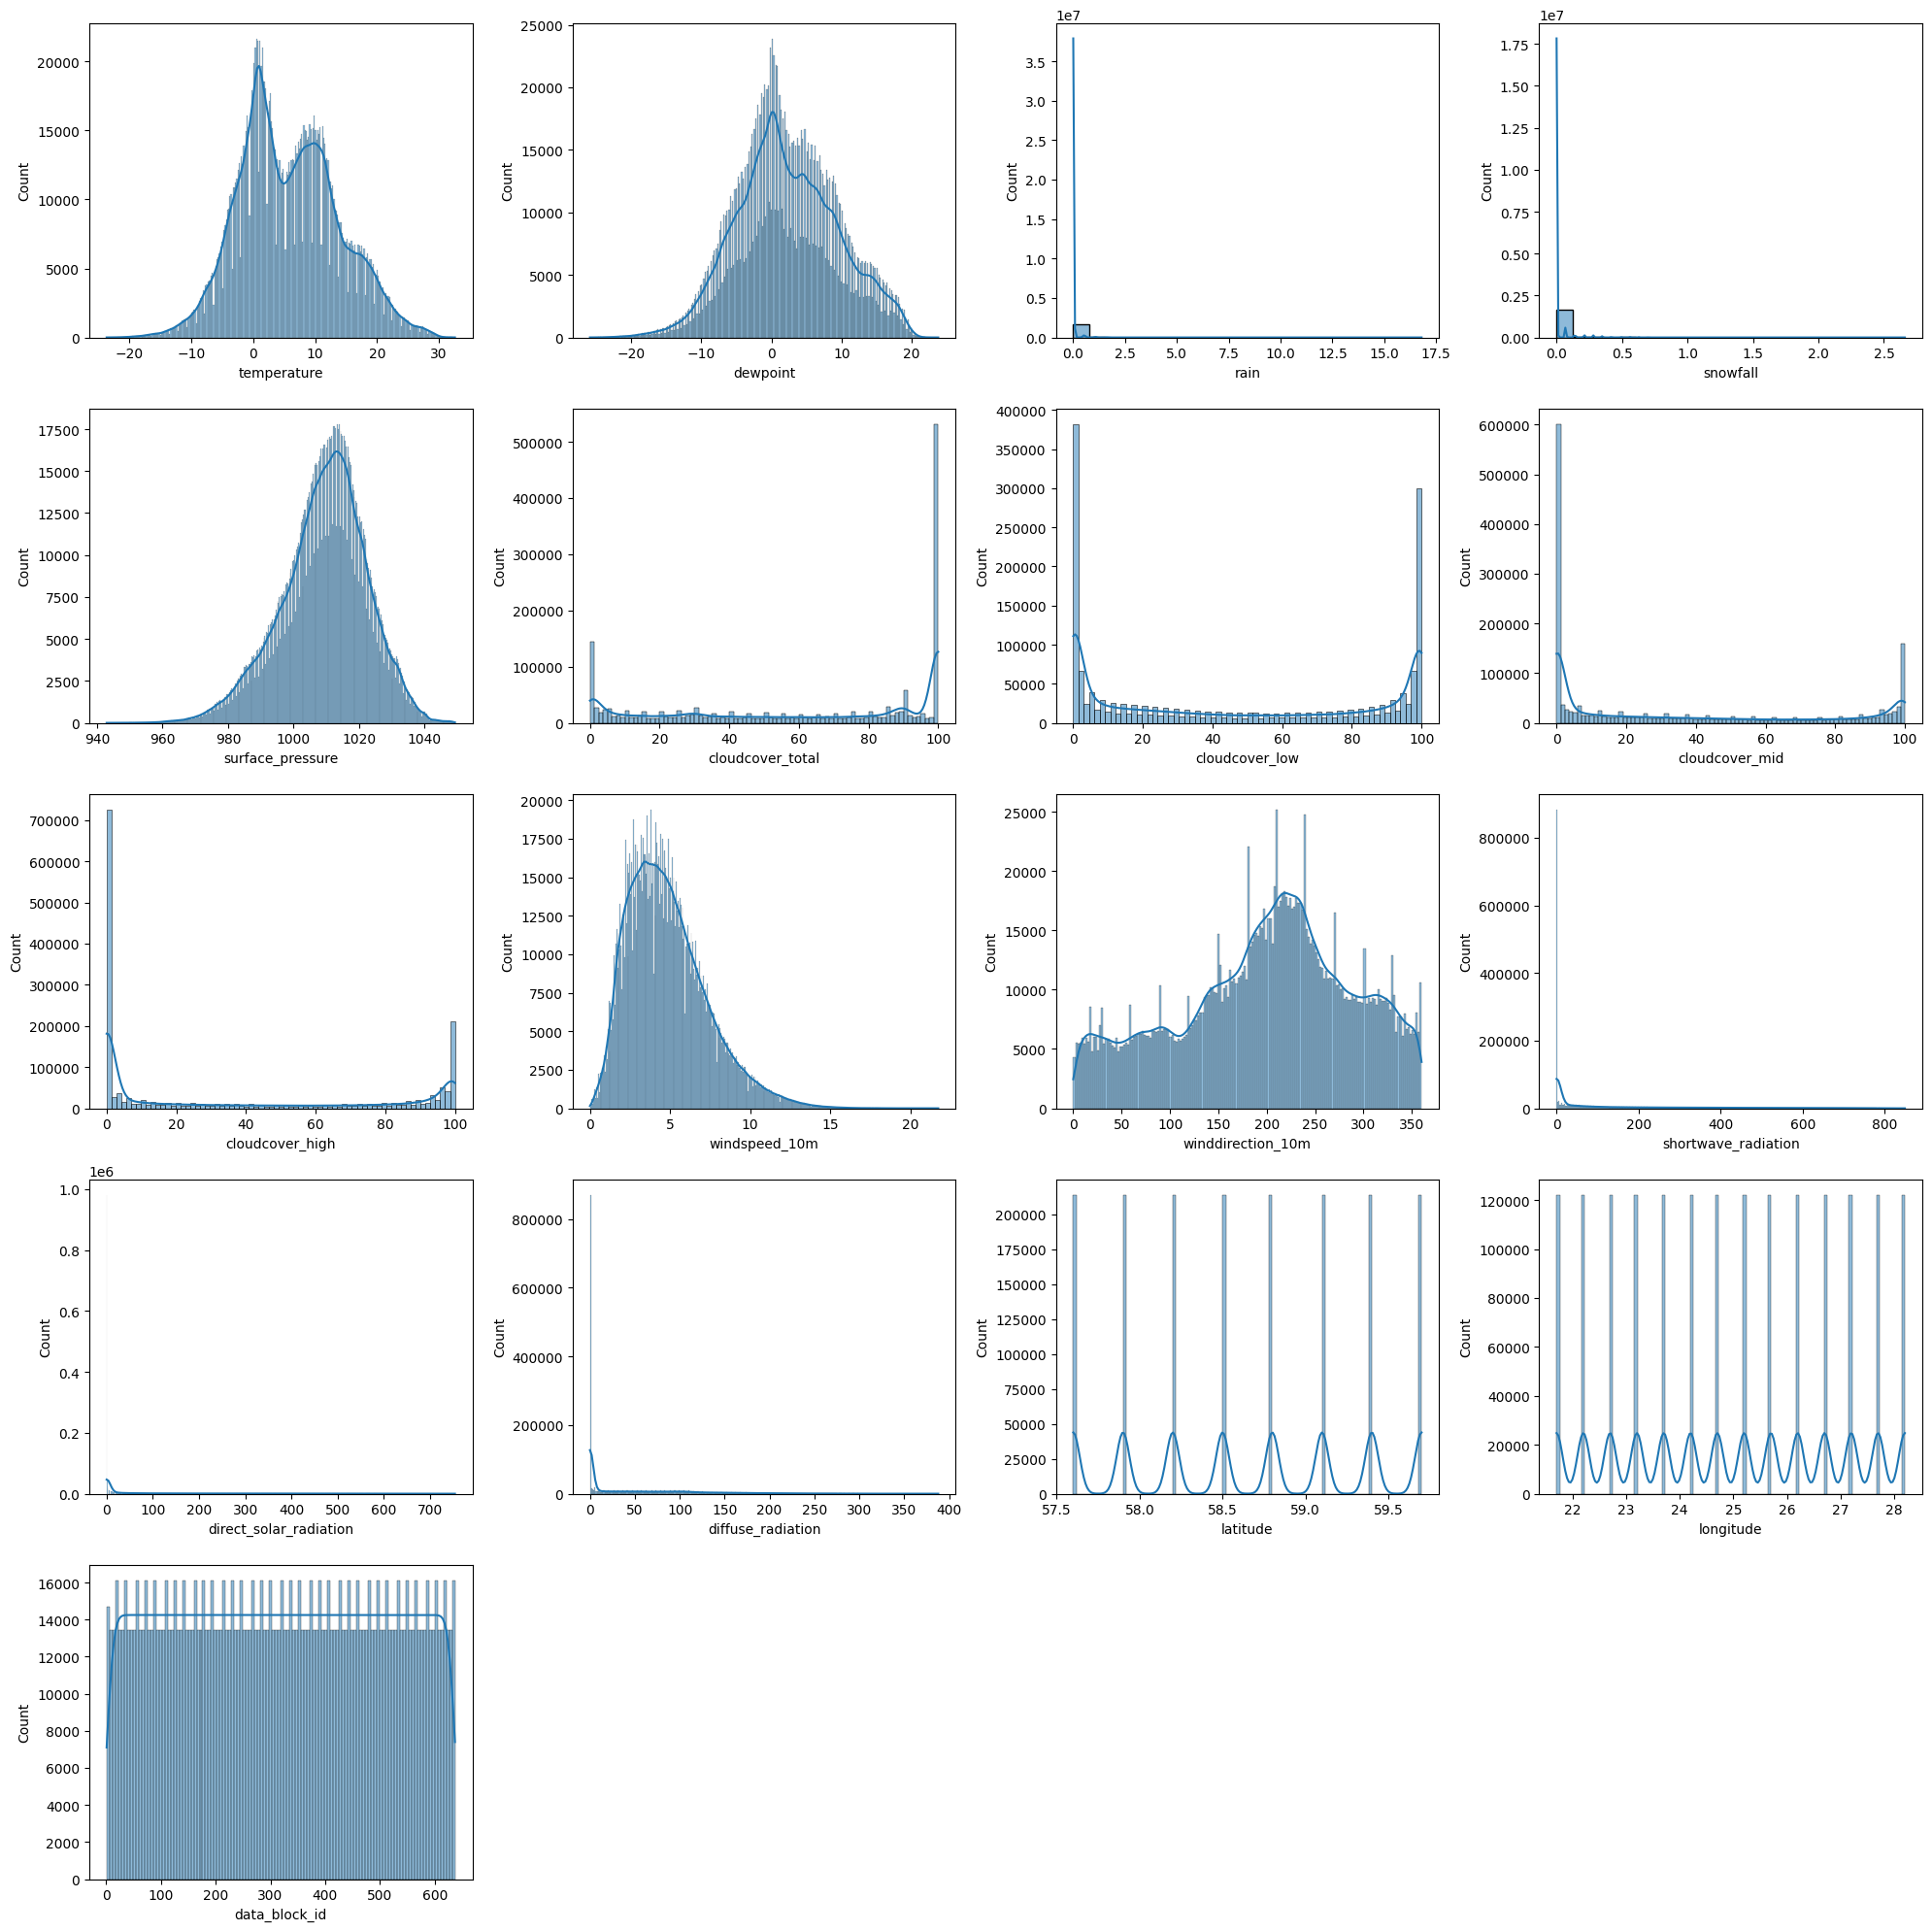

In [3]:
# Importing visualization libraries and numeric operations for data analysis and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplot grid
num_plots = len(numeric_columns)
num_columns = 4
num_rows = math.ceil(num_plots / num_columns)

# Create a grid of histograms
plt.figure(figsize=(20, num_rows * 4))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(data[column], kde=True)
    plt.tight_layout()

# Show the plots
plt.show()


##Correlation Matrix

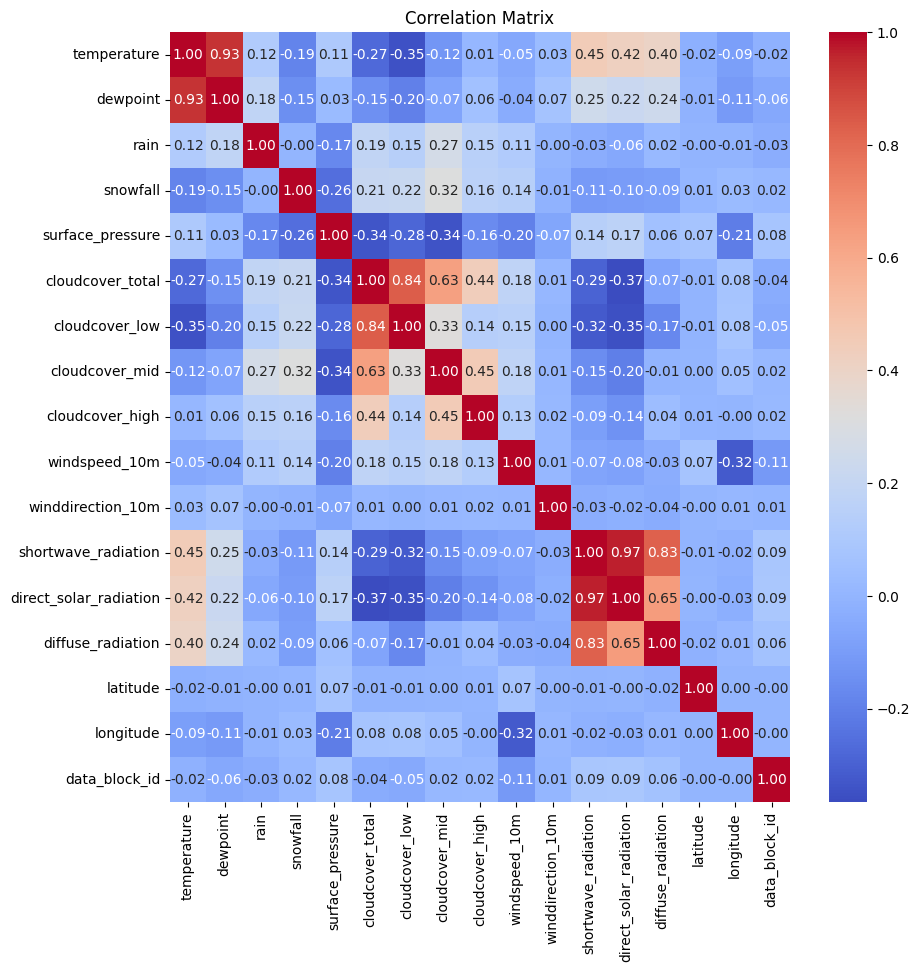

In [4]:
# Select only columns with numeric data types for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Display a correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
